In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

file_path = '/content/drive/MyDrive/Portfolio/Projects/sport_multivariate_regression_analysis/player_stats.csv'
df = pd.read_csv(file_path, encoding='latin1')

# Display the first few rows of the DataFrame
display(df.head())

,player,country,height,weight,age,club,ball_control,dribbling,marking,slide_tackle,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
0,Cristian Castro Devenish,Colombia,192,84,22,Atl. Nacional,55,43,NaN,68,...,32,34,41,33,10,11,6,7,9,$1.400.000
1,Silaldo Taffarel,Brazil,181,80,31,Corinthians,69,70,NaN,56,...,65,62,48,46,12,15,14,8,14,$975.00
2,Thomas DÃ¤hne,Germany,193,84,29,Holstein Kiel,25,12,NaN,13,...,20,15,26,16,64,74,65,68,74,$1.100.000
3,Michael Sollbauer,Austria,187,86,33,SK Rapid Wien,46,48,NaN,66,...,25,13,22,19,10,10,8,14,9,$650.00
4,Diego Segovia,Uruguay,191,80,23,Independiente,14,8,NaN,14,...,9,10,16,5,61,59,62,64,64,$300.00


In [3]:
# Check the shape of the DataFrame (number of rows and columns)
print("Shape of the DataFrame:", df.shape)

# Get basic information about the DataFrame (column data types, non-null values, memory usage)
print("\nInformation about the DataFrame:")
df.info()

Shape of the DataFrame: (5682, 41)

Information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   player          5682 non-null   object 
 1   country         5682 non-null   object 
 2   height          5682 non-null   int64  
 3   weight          5682 non-null   int64  
 4   age             5682 non-null   int64  
 5   club            5682 non-null   object 
 6   ball_control    5682 non-null   int64  
 7   dribbling       5682 non-null   int64  
 8   marking         0 non-null      float64
 9   slide_tackle    5682 non-null   int64  
 10  stand_tackle    5682 non-null   int64  
 11  aggression      5682 non-null   int64  
 12  reactions       5682 non-null   int64  
 13  att_position    5682 non-null   int64  
 14  interceptions   5682 non-null   int64  
 15  vision          5682 non-null   int64  
 16  composure

In [4]:
df = df.drop('marking', axis=1)

# Verify that the column has been dropped
print("Shape of the DataFrame after dropping 'marking':", df.shape)

Shape of the DataFrame after dropping 'marking': (5682, 40)


In [5]:
# Display descriptive statistics for numerical columns
display(df.describe())

# Display descriptive statistics for object columns
display(df.describe(include='object'))

,height,weight,age,ball_control,dribbling,slide_tackle,stand_tackle,aggression,reactions,att_position,...,long_shots,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes
count,5682.000000,5682.000000,5682.000000,5682.000000,5682.000000,5682.000000,5682.000000,5682.000000,5682.000000,5682.000000,...,5682.000000,5682.000000,5682.000000,5682.000000,5682.000000,5682.000000,5682.00000,5682.000000,5682.000000,5682.000000
mean,181.670539,75.282295,26.316262,58.912179,56.128476,46.728441,48.820838,56.324006,61.959345,50.724921,...,47.164203,48.099789,43.299542,48.174938,42.931890,16.187610,16.43805,16.191834,16.071982,16.570222
std,6.829238,6.998971,4.729967,16.567068,18.772075,20.519430,20.975966,16.846410,8.893309,19.780636,...,19.463368,18.086672,17.086473,15.781737,17.912619,17.146572,17.63526,16.993154,16.808674,17.942154
min,156.000000,54.000000,17.000000,8.000000,5.000000,7.000000,7.000000,11.000000,32.000000,3.000000,...,5.000000,7.000000,4.000000,8.000000,4.000000,2.000000,2.00000,2.000000,2.000000,3.000000
25%,177.000000,70.000000,23.000000,55.000000,51.000000,27.000000,30.000000,45.000000,56.000000,40.000000,...,33.000000,36.000000,32.000000,39.000000,30.000000,8.000000,8.00000,8.000000,8.000000,8.000000
50%,182.000000,75.000000,26.000000,63.000000,62.000000,54.000000,57.000000,60.000000,62.000000,56.000000,...,51.000000,50.000000,43.000000,49.000000,44.000000,11.000000,11.00000,11.000000,11.000000,11.000000
75%,186.000000,80.000000,30.000000,69.000000,68.000000,64.000000,66.000000,69.000000,68.000000,65.000000,...,62.000000,62.000000,56.000000,60.000000,57.000000,14.000000,14.00000,14.000000,14.000000,14.000000
max,204.000000,102.000000,41.000000,94.000000,95.000000,87.000000,91.000000,96.000000,93.000000,93.000000,...,91.000000,93.000000,94.000000,92.000000,90.000000,90.000000,90.00000,87.000000,90.000000,89.000000


,player,country,club,value
count,5682,5682,5682,5682
unique,5657,135,689,191
top,Pacheco,England,River Plate,$1.200.000
freq,3,516,21,182


In [6]:
# Display descriptive statistics for object columns
display(df.describe(include='object'))

,player,country,club,value
count,5682,5682,5682,5682
unique,5657,135,689,191
top,Pacheco,England,River Plate,$1.200.000
freq,3,516,21,182


count: This is the number of non-null entries in each object column. In this case, all object columns ('player', 'country', 'club', and 'value') have 5682 non-null values, which is the total number of rows in your DataFrame.

unique: This shows the number of distinct or unique values in each column. For example, there are 5657 unique player names and 135 unique countries.

top: This indicates the most frequently occurring value in each column.

In [7]:
# Identify missing values across all columns
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print("Missing values per column:")
print(missing_values)

Missing values per column:
player            0
country           0
height            0
weight            0
age               0
club              0
ball_control      0
dribbling         0
slide_tackle      0
stand_tackle      0
aggression        0
reactions         0
att_position      0
interceptions     0
vision            0
composure         0
crossing          0
short_pass        0
long_pass         0
acceleration      0
stamina           0
strength          0
balance           0
sprint_speed      0
agility           0
jumping           0
heading           0
shot_power        0
finishing         0
long_shots        0
curve             0
fk_acc            0
penalties         0
volleys           0
gk_positioning    0
gk_diving         0
gk_handling       0
gk_kicking        0
gk_reflexes       0
value             0
dtype: int64


In [8]:
# Clean and convert the 'value' column to numeric
df['value'] = df['value'].astype(str).str.replace('[$,.]', '', regex=True)
df['value'] = pd.to_numeric(df['value'])

# Display the data type of the 'value' column to verify the conversion
print("Data type of 'value' column after conversion:", df['value'].dtype)

# Display the first few rows to see the updated 'value' column
display(df.head())

Data type of 'value' column after conversion: int64


,player,country,height,weight,age,club,ball_control,dribbling,slide_tackle,stand_tackle,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
0,Cristian Castro Devenish,Colombia,192,84,22,Atl. Nacional,55,43,68,73,...,32,34,41,33,10,11,6,7,9,1400000
1,Silaldo Taffarel,Brazil,181,80,31,Corinthians,69,70,56,58,...,65,62,48,46,12,15,14,8,14,97500
2,Thomas DÃ¤hne,Germany,193,84,29,Holstein Kiel,25,12,13,16,...,20,15,26,16,64,74,65,68,74,1100000
3,Michael Sollbauer,Austria,187,86,33,SK Rapid Wien,46,48,66,69,...,25,13,22,19,10,10,8,14,9,65000
4,Diego Segovia,Uruguay,191,80,23,Independiente,14,8,14,16,...,9,10,16,5,61,59,62,64,64,30000


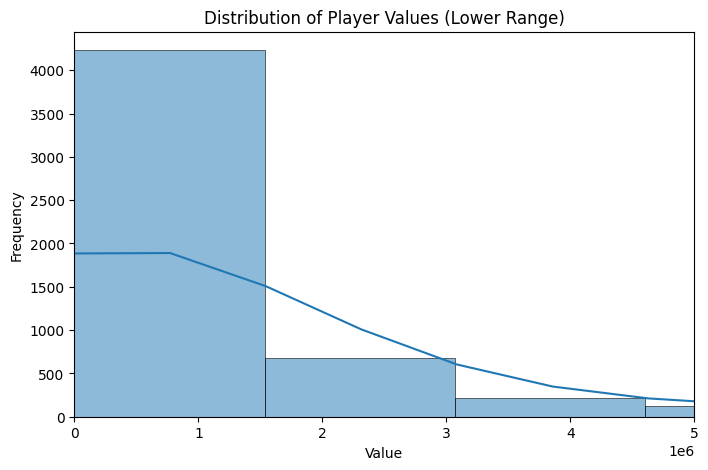

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5)) # Decreased figure size
sns.histplot(df['value'], kde=True, bins=100) # Increased number of bins
plt.title('Distribution of Player Values (Lower Range)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xlim(0, 5000000) # Set x-axis limit to focus on lower values
plt.show()

The histogram shows that most players have values below $1,000,000. As value increases within the lower range, the number of players decreases significantly. The distribution is right-skewed even in this range, confirming that a large number of players have relatively low values compared to a few high-value players.

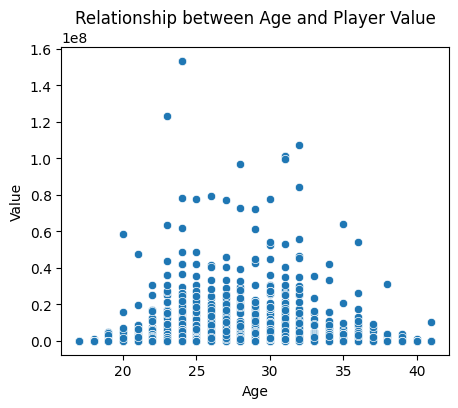

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,4))
sns.scatterplot(x='age', y='value', data=df)
plt.title('Relationship between Age and Player Value')
plt.xlabel('Age')
plt.ylabel('Value')
plt.show()

The scatter plot shows that player values generally peak in the mid-20s and tend to decrease for both younger and older players. While this trend exists, there's a wide spread of values at every age, indicating that age is not the only factor determining a player's market value.

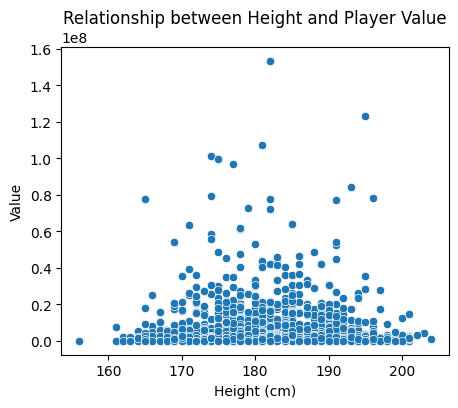

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,4))
sns.scatterplot(x='height', y='value', data=df)
plt.title('Relationship between Height and Player Value')
plt.xlabel('Height (cm)')
plt.ylabel('Value')
plt.show()

Concentration of players: A large concentration of players seems to be in the height range of approximately 175 cm to 190 cm. Within this range, there is a wide spread of player values, indicating that height in this typical range doesn't strongly determine value on its own.

High-value players across different heights: High-value players (those with values in the millions, appearing as points higher up on the y-axis) are scattered across various heights, not concentrated at any specific height. This suggests that while extreme height might be a factor for certain positions, overall value is likely influenced by many other attributes

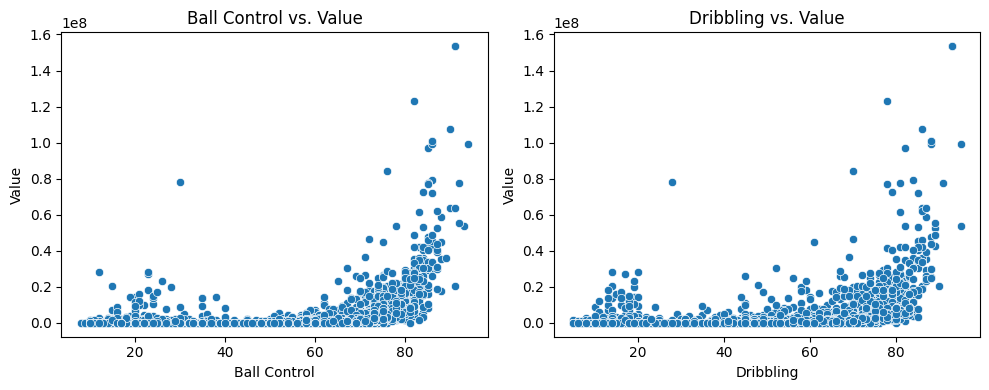

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots (side by side)
plt.figure(figsize=(10, 4)) # Adjusted figure size for side-by-side plots

# Scatter plot for Ball Control vs. Value (in the first subplot)
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
sns.scatterplot(x='ball_control', y='value', data=df)
plt.title('Ball Control vs. Value')
plt.xlabel('Ball Control')
plt.ylabel('Value')

# Scatter plot for Dribbling vs. Value (in the second subplot)
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
sns.scatterplot(x='dribbling', y='value', data=df)
plt.title('Dribbling vs. Value')
plt.xlabel('Dribbling')
plt.ylabel('Value')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

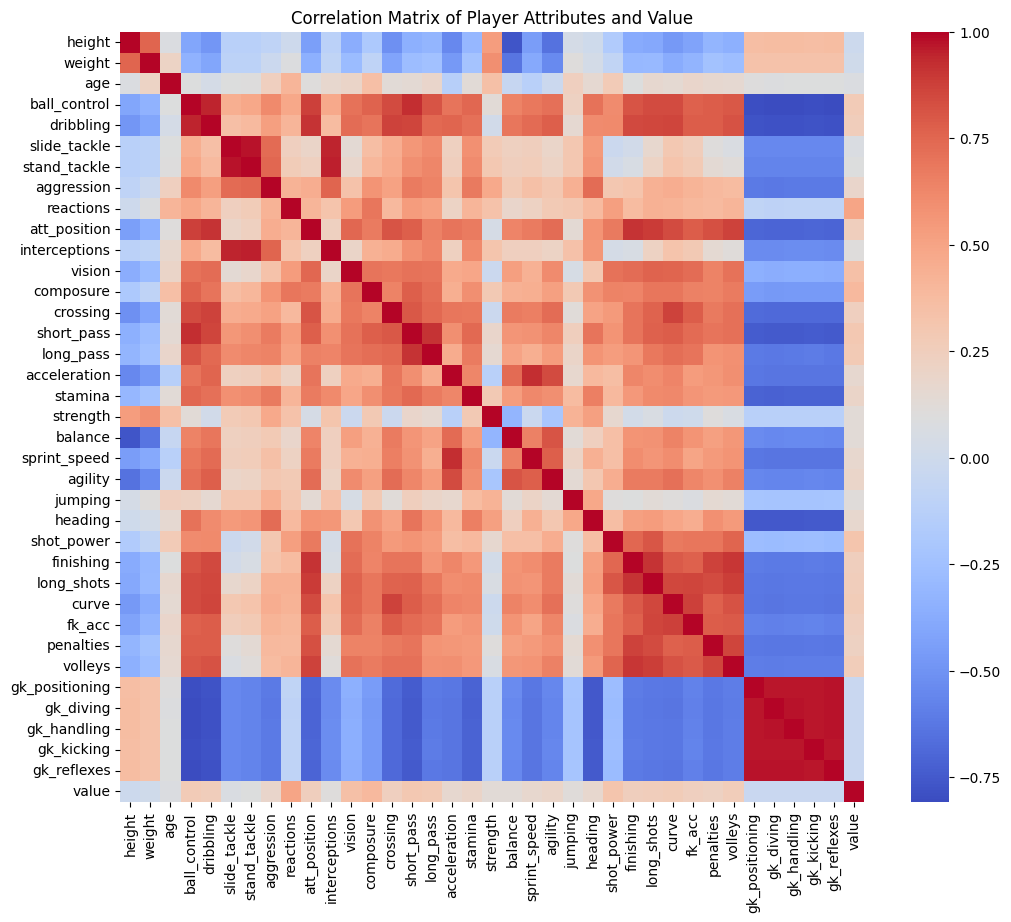

In [13]:
# Select only numerical columns for correlation analysis
df_numerical = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = df_numerical.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix of Player Attributes and Value')
plt.show()

In [14]:
# Extract the correlations with the 'value' column
value_correlations = correlation_matrix['value'].sort_values(ascending=False)

# Display the correlations with 'value'
print("Correlation with 'value':")
print(value_correlations)

Correlation with 'value':
value             1.000000
reactions         0.498249
composure         0.390004
vision            0.344902
shot_power        0.319636
short_pass        0.299222
long_pass         0.281745
ball_control      0.276533
curve             0.272052
volleys           0.264889
long_shots        0.255690
dribbling         0.252102
att_position      0.248584
finishing         0.248191
fk_acc            0.239217
crossing          0.238732
penalties         0.227541
stamina           0.200885
agility           0.190445
aggression        0.183928
heading           0.172257
sprint_speed      0.168206
acceleration      0.165094
balance           0.130907
strength          0.125101
jumping           0.114214
interceptions     0.109829
stand_tackle      0.094124
age               0.079439
slide_tackle      0.074743
weight            0.008034
height           -0.014220
gk_positioning   -0.031339
gk_reflexes      -0.033307
gk_kicking       -0.034410
gk_handling      -0.034569
gk

In [15]:
# Identify attributes with strong positive correlation (threshold > 0.3)
strong_positive_correlations = value_correlations[value_correlations > 0.3]
print("Attributes with strong positive correlation with 'value':")
print(strong_positive_correlations)

# Identify attributes with strong negative correlation (threshold < -0.3)
strong_negative_correlations = value_correlations[value_correlations < -0.3]
print("\nAttributes with strong negative correlation with 'value':")
print(strong_negative_correlations)

Attributes with strong positive correlation with 'value':
value         1.000000
reactions     0.498249
composure     0.390004
vision        0.344902
shot_power    0.319636
Name: value, dtype: float64

Attributes with strong negative correlation with 'value':
Series([], Name: value, dtype: float64)


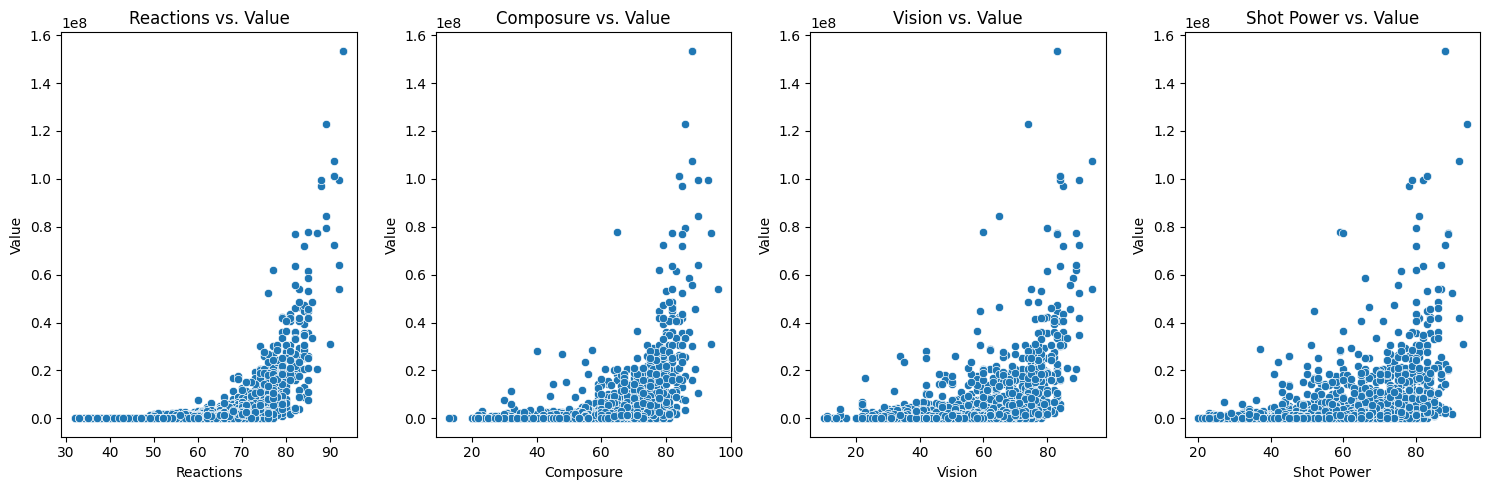

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with subplots for each strongly correlated attribute
plt.figure(figsize=(15, 5))

# Scatter plot for Reactions vs. Value
plt.subplot(1, 4, 1)
sns.scatterplot(x='reactions', y='value', data=df)
plt.title('Reactions vs. Value')
plt.xlabel('Reactions')
plt.ylabel('Value')

# Scatter plot for Composure vs. Value
plt.subplot(1, 4, 2)
sns.scatterplot(x='composure', y='value', data=df)
plt.title('Composure vs. Value')
plt.xlabel('Composure')
plt.ylabel('Value')

# Scatter plot for Vision vs. Value
plt.subplot(1, 4, 3)
sns.scatterplot(x='vision', y='value', data=df)
plt.title('Vision vs. Value')
plt.xlabel('Vision')
plt.ylabel('Value')

# Scatter plot for Shot Power vs. Value
plt.subplot(1, 4, 4)
sns.scatterplot(x='shot_power', y='value', data=df)
plt.title('Shot Power vs. Value')
plt.xlabel('Shot Power')
plt.ylabel('Value')

plt.tight_layout()
plt.show()

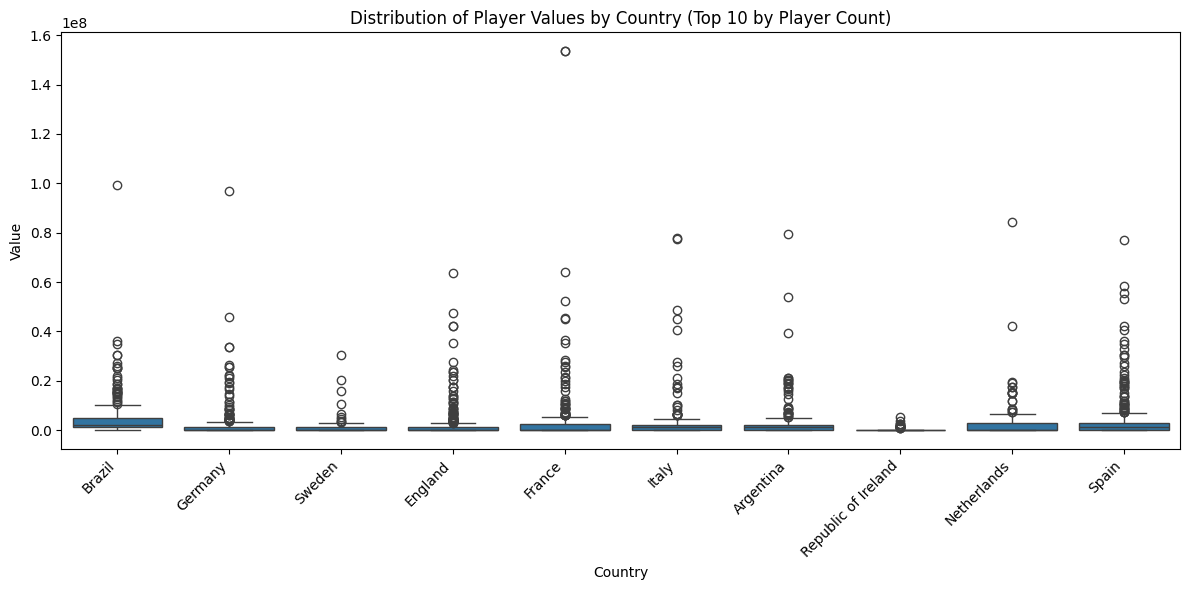

In [17]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Select 'country' for box plotting and get the top 10 countries by player count
top_countries = df['country'].value_counts().nlargest(10).index.tolist()
df_top_countries = df[df['country'].isin(top_countries)]

# Create a box plot for 'value' by 'country' for the top countries
plt.figure(figsize=(12, 6))
sns.boxplot(x='country', y='value', data=df_top_countries)
plt.title('Distribution of Player Values by Country (Top 10 by Player Count)')
plt.xlabel('Country')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

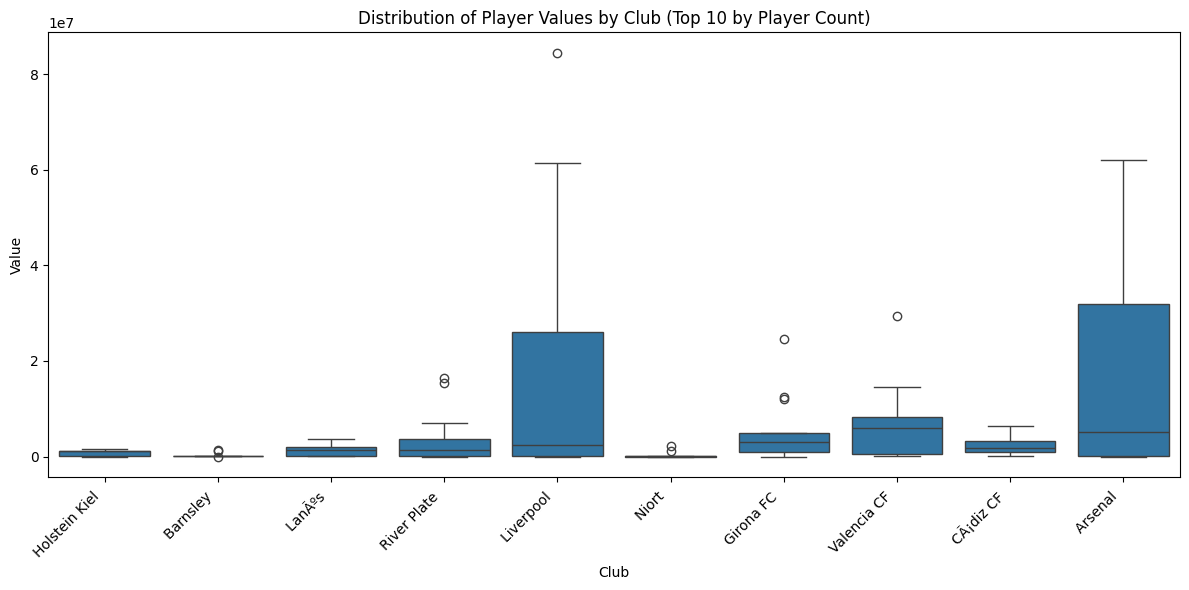

In [18]:
# Select 'club' for box plotting and get the top 10 clubs by player count
top_clubs = df['club'].value_counts().nlargest(10).index.tolist()
df_top_clubs = df[df['club'].isin(top_clubs)]

# Create a box plot for 'value' by 'club' for the top clubs
plt.figure(figsize=(12, 6))
sns.boxplot(x='club', y='value', data=df_top_clubs)
plt.title('Distribution of Player Values by Club (Top 10 by Player Count)')
plt.xlabel('Club')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

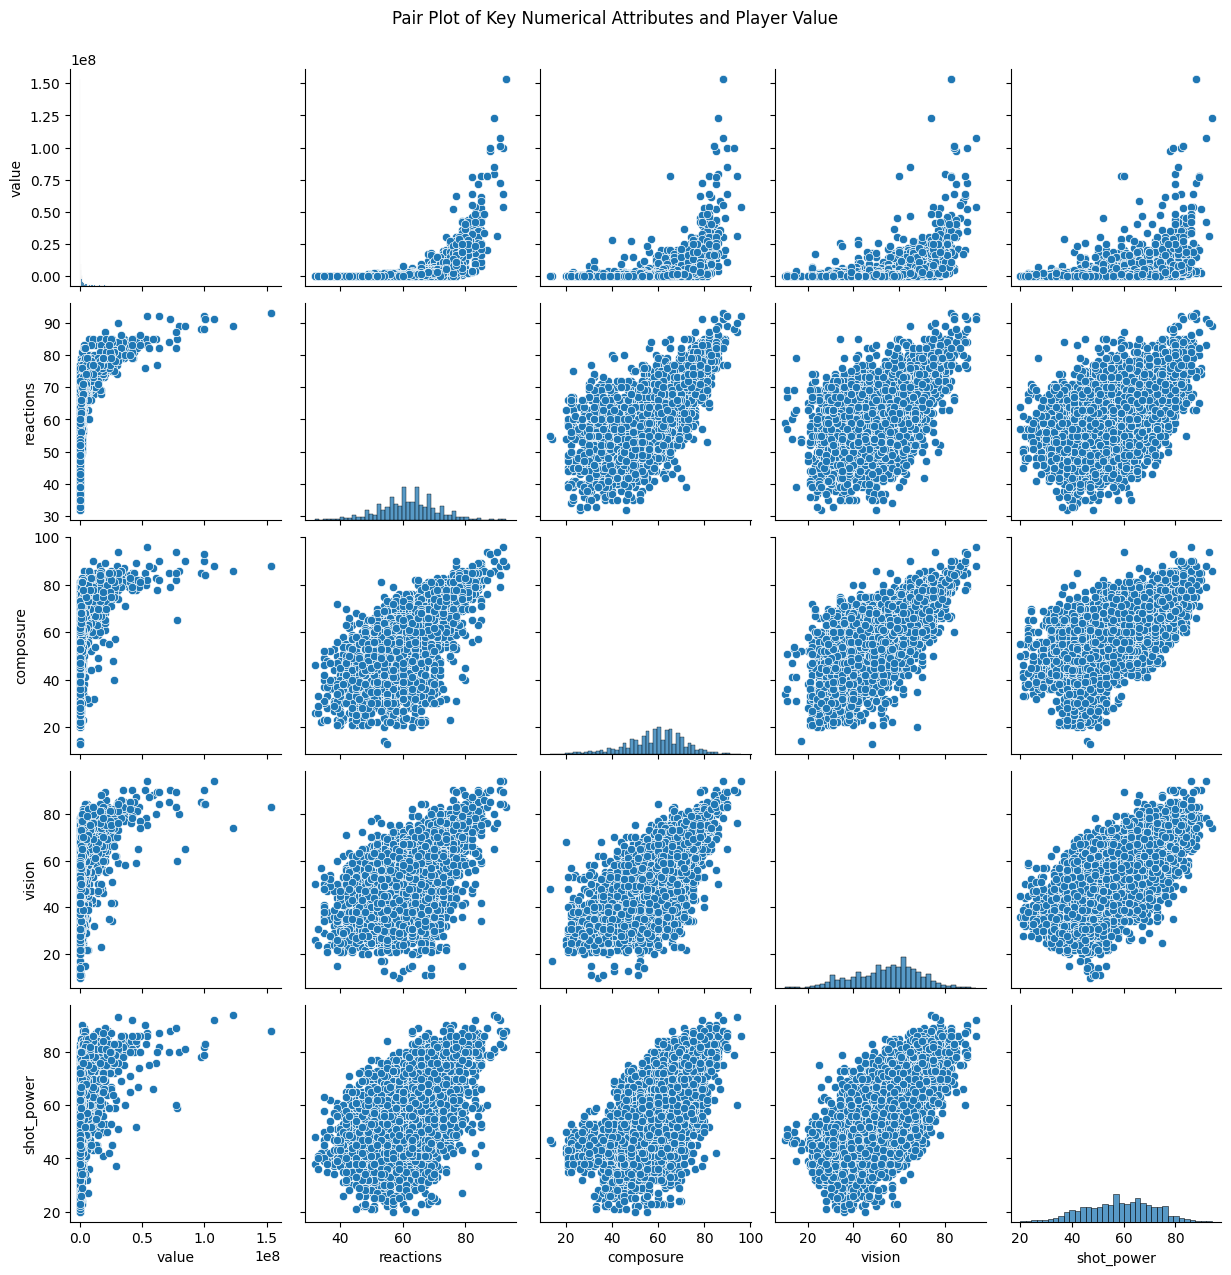

In [19]:
# Select key numerical attributes for the pair plot, including 'value'
# Based on previous analysis, 'reactions', 'composure', 'vision', and 'shot_power'
# had strong positive correlations with 'value'.
key_numerical_attributes = ['value', 'reactions', 'composure', 'vision', 'shot_power']

# Create a pair plot for the selected attributes
sns.pairplot(df[key_numerical_attributes])
plt.suptitle('Pair Plot of Key Numerical Attributes and Player Value', y=1.02) # Add a title to the figure
plt.show()

## Summary:

### Data Analysis Key Findings

*   Numerical attributes with the strongest positive correlations with 'value' include 'reactions', 'composure', 'vision', and 'shot_power'.
*   No numerical attributes were found to have a strong negative correlation (below -0.3) with 'value'.
*   Scatter plots visually confirmed the positive relationships between 'value' and 'reactions', 'composure', 'vision', and 'shot_power', showing a general trend of increasing value with higher scores in these attributes.
*   Box plots revealed the distribution of player values varies significantly across different countries and clubs. Specifically, players from certain top countries and clubs tend to have higher median values and a greater range of values, including high-value outliers, compared to others.
*   The pair plot visualized the pairwise relationships among 'value', 'reactions', 'composure', 'vision', and 'shot_power'. The diagonal of the pair plot showed the distribution of each attribute, while the off-diagonal plots displayed the scatter plots between each pair of attributes, reinforcing the observed positive correlations.



In [20]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Print the number of numerical and categorical columns
print(f"Number of numerical columns: {len(numerical_cols)}")
print(f"Number of categorical columns: {len(categorical_cols)}")

# Print the names of the numerical columns
print("\nNumerical columns:")
print(numerical_cols)

# Print the names of the categorical columns
print("\nCategorical columns:")
print(categorical_cols)

Number of numerical columns: 37
Number of categorical columns: 3

Numerical columns:
['height', 'weight', 'age', 'ball_control', 'dribbling', 'slide_tackle', 'stand_tackle', 'aggression', 'reactions', 'att_position', 'interceptions', 'vision', 'composure', 'crossing', 'short_pass', 'long_pass', 'acceleration', 'stamina', 'strength', 'balance', 'sprint_speed', 'agility', 'jumping', 'heading', 'shot_power', 'finishing', 'long_shots', 'curve', 'fk_acc', 'penalties', 'volleys', 'gk_positioning', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'value']

Categorical columns:
['player', 'country', 'club']


In [21]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Create a ColumnTransformer to apply one-hot encoding to categorical columns
# 'passthrough' is used for numerical columns to keep them as they are
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough' # Keep numerical columns
)

In [22]:
import numpy as np

# Fit and transform the DataFrame using the preprocessor
df_encoded = preprocessor.fit_transform(df)

# Get the names of the new columns after one-hot encoding
# preprocessor.named_transformers_['cat'] accesses the OneHotEncoder
# get_feature_names_out() gets the names of the features generated by the encoder
categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)

# Get the names of the remaining (numerical) columns
remaining_feature_names = [col for col in df.columns if col not in categorical_cols]

# Combine the feature names
all_feature_names = list(categorical_feature_names) + remaining_feature_names

# Convert the encoded data (sparse matrix) to a dense array and then to a DataFrame
df_encoded = pd.DataFrame(df_encoded.toarray(), columns=all_feature_names)

# Display the first few rows and the shape of the encoded DataFrame
display(df_encoded.head())
print("Shape of the encoded DataFrame:", df_encoded.shape)

,player_Aaron Appindangoye,player_Aaron Basenach,player_Aaron Connolly,player_Aaron Evans,player_Aaron Greene,player_Aaron Gurd,player_Aaron McNally,player_Aaron Meijers,player_Aaron Morley,player_Aaron Pavecillo,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,32.0,34.0,41.0,33.0,10.0,11.0,6.0,7.0,9.0,1400000.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,65.0,62.0,48.0,46.0,12.0,15.0,14.0,8.0,14.0,97500.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,15.0,26.0,16.0,64.0,74.0,65.0,68.0,74.0,1100000.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,25.0,13.0,22.0,19.0,10.0,10.0,8.0,14.0,9.0,65000.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,10.0,16.0,5.0,61.0,59.0,62.0,64.0,64.0,30000.0


Shape of the encoded DataFrame: (5682, 6518)


In [23]:
from sklearn.preprocessing import StandardScaler

# Identify the numerical features to scale (excluding the target variable 'value')
numerical_features_to_scale = numerical_cols.copy()
numerical_features_to_scale.remove('value')

# Instantiate a StandardScaler
scaler = StandardScaler()

# Apply the scaler to the selected numerical features in df_encoded
df_encoded[numerical_features_to_scale] = scaler.fit_transform(df_encoded[numerical_features_to_scale])

# Display the first few rows of the scaled numerical columns to verify the scaling
display(df_encoded[numerical_features_to_scale].head())

,height,weight,age,ball_control,dribbling,slide_tackle,stand_tackle,aggression,reactions,att_position,...,long_shots,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes
0,1.512668,1.245679,-0.912616,-0.236163,-0.699424,1.036746,1.152809,0.930606,0.679296,-1.047830,...,-0.830567,-0.890225,-0.544311,-0.454676,-0.554512,-0.360897,-0.308389,-0.599814,-0.539768,-0.421961
1,-0.098195,0.674116,0.990314,0.608962,0.739010,0.451883,0.437642,0.336956,0.904204,0.923969,...,1.070608,0.934484,1.094556,-0.011086,0.171297,-0.244246,-0.081551,-0.128995,-0.480269,-0.143263
2,1.659110,1.245679,0.567440,-2.047143,-2.350958,-1.643877,-1.564826,-1.740821,0.341934,-1.705096,...,-1.395781,-1.553755,-1.656400,-1.405225,-1.503647,2.788697,3.264313,2.872478,3.089630,3.201111
3,0.780458,1.531461,1.413187,-0.779457,-0.433047,0.939269,0.962098,0.871241,0.229480,-0.137769,...,-0.727801,-1.277284,-1.773462,-1.658705,-1.336153,-0.360897,-0.365099,-0.482109,-0.123279,-0.421961
4,1.366226,0.674116,-0.701179,-2.711170,-2.564059,-1.595138,-1.564826,-1.681456,-1.344876,-2.059009,...,-2.115144,-2.161991,-1.949055,-2.038925,-2.117793,2.613720,2.413670,2.695921,2.851637,2.643716


In [24]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_encoded.drop('value', axis=1)
y = df_encoded['value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (4545, 6517)
Shape of X_test: (1137, 6517)
Shape of y_train: (4545,)
Shape of y_test: (1137,)


In [30]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Create a dictionary of regression models
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=42),
    'RandomForestRegressor': RandomForestRegressor(random_state=42),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42),
}

print("Regression models initialized:")
for name in models:
    print(name)

Regression models initialized:
LinearRegression
Ridge
Lasso
ElasticNet
DecisionTreeRegressor
RandomForestRegressor
GradientBoostingRegressor


In [31]:
# Train each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    print(f"{name} trained.")

Training LinearRegression...
LinearRegression trained.
Training Ridge...
Ridge trained.
Training Lasso...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.809e+13, tolerance: 2.618e+13
  model = cd_fast.enet_coordinate_descent(


Lasso trained.
Training ElasticNet...
ElasticNet trained.
Training DecisionTreeRegressor...
DecisionTreeRegressor trained.
Training RandomForestRegressor...
RandomForestRegressor trained.
Training GradientBoostingRegressor...
GradientBoostingRegressor trained.


In [32]:
from sklearn.metrics import mean_squared_error, r2_score

# Create an empty dictionary to store the evaluation metrics
results = {}

# Iterate through the trained models
for name, model in models.items():
    print(f"Evaluating {name}...")
    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)

    # Calculate R-squared score
    r2 = r2_score(y_test, y_pred)

    # Store the metrics in the results dictionary
    results[name] = {'MSE': mse, 'R-squared': r2}
    print(f"{name} evaluated.")

# Print the evaluation metrics for each model
print("\nModel Evaluation Results:")
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  Mean Squared Error (MSE): {metrics['MSE']:.2f}")
    print(f"  R-squared (R2): {metrics['R-squared']:.2f}")

Evaluating LinearRegression...
LinearRegression evaluated.
Evaluating Ridge...
Ridge evaluated.
Evaluating Lasso...
Lasso evaluated.
Evaluating ElasticNet...
ElasticNet evaluated.
Evaluating DecisionTreeRegressor...
DecisionTreeRegressor evaluated.
Evaluating RandomForestRegressor...
RandomForestRegressor evaluated.
Evaluating GradientBoostingRegressor...
GradientBoostingRegressor evaluated.

Model Evaluation Results:
LinearRegression:
  Mean Squared Error (MSE): 35965902241078.22
  R-squared (R2): 0.40
Ridge:
  Mean Squared Error (MSE): 36724090775034.03
  R-squared (R2): 0.38
Lasso:
  Mean Squared Error (MSE): 53576521605553.76
  R-squared (R2): 0.10
ElasticNet:
  Mean Squared Error (MSE): 45334171411040.46
  R-squared (R2): 0.24
DecisionTreeRegressor:
  Mean Squared Error (MSE): 12969002690070.36
  R-squared (R2): 0.78
RandomForestRegressor:
  Mean Squared Error (MSE): 5896900928756.73
  R-squared (R2): 0.90
GradientBoostingRegressor:
  Mean Squared Error (MSE): 4019758032296.67
  R

In [34]:
# Find the model with the lowest MSE
best_model_mse = min(results, key=lambda k: results[k]['MSE'])
lowest_mse = results[best_model_mse]['MSE']

# Find the model with the highest R-squared
best_model_r2 = max(results, key=lambda k: results[k]['R-squared'])
highest_r2 = results[best_model_r2]['R-squared']

# Determine the best overall model (lowest MSE and highest R-squared)
# In this case, both metrics point to the same model based on the results
best_model = best_model_mse # Or best_model_r2, they are the same here

print("Best performing model based on evaluation metrics:")
print(f"Model: {best_model}")
print(f"Mean Squared Error (MSE): {results[best_model]['MSE']:.2f}")
print(f"R-squared (R2): {results[best_model]['R-squared']:.2f}")

Best performing model based on evaluation metrics:
Model: GradientBoostingRegressor
Mean Squared Error (MSE): 4019758032296.67
R-squared (R2): 0.93


## Summary:

### Data Analysis Key Findings

*   A variety of regression models were initialized, including Linear Regression, Ridge, Lasso, Elastic Net, Decision Tree Regressor, Random Forest Regressor, Gradient Boosting Regressor.
*   All selected models were successfully trained on the provided training data. A `ConvergenceWarning` was noted for the Lasso model during training.
*   The performance of each trained model was evaluated on the test data using Mean Squared Error (MSE) and R-squared metrics.
*   The Gradient Boosting Regressor model achieved the lowest MSE (approximately 4,019,758,032,296.67) and the highest R-squared value (0.93).

